# Group detection

By using *uncontrolled modeling* methods we discover unknown structure in data. The central assumption of such methods is that there are subsets of similar cases in the data.

In [1]:
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')

## K-means clustering

K-means clustering is one of the simpler and often used methods of an uncontrolled algorithm. Computational efficiency is also an important advantage. You can find additional details in <a href="http://www-users.cs.umn.edu/~kumar/dmbook/ch8.pdf">literature</a>.

##### Question 4-1-1

Implement a Group Detection Algorithm with K-means clustering. Hel pyourself with the following pseudocode:

```
Randomly select *K* points - centers.
**repeat**
     Determines the nearest center of each point.
     Calculate new centers - the centers of the respective groups.
**until** centers are no longer changing.
```

Calculate the distance between the points $\vec{x} = (x_1, x_2, ... x_p)$ and $\vec{y} = (y_1, y_2, ... y_p)$ using the Euclidean distance:

 $$\|\vec{x} - \vec{y}\| = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + ... + (x_p-y_p)^2} $$

[Answer](http://localhost:8888/notebooks/rešitve_04-1_gručenje_voditelji.ipynb#odgovor-4-1-1)

##### Question 4-1-2

What is the time complexity of the algorithm in relation to the number of cases and the number of attributes?

*answer space*

[Answer](http://localhost:8888/notebooks/rešitve_04-1_gručenje_voditelji.ipynb#odgovor-4-1-2)

In [2]:
class KMeans:
    
    def __init__(self, k=10, max_iter=100):
        """
        Initialize KMeans clustering model.
        
        :param k
            Number of clusters.
        :param max_iter
            Maximum number of iterations.
        """
        self.k         = k
        self.max_iter  = max_iter    
    
    def fit(self, X):
        """
        Fit the Kmeans model to data.
        
        :param X
            Numpy array of shape (n, p)
            n: number of data examples
            p: number of features (attributes)
        
        :return 
            labels: array of shape (n, ), cluster labels (0..k-1)
            centers: array of shape (k, p, )
        """
        
        n, p    = X.shape
        labels  = np.random.choice(range(self.k), size=n, replace=True)
        
        # Choose k random data points for initial centers
        centers = np.array([X[i] for i in np.random.choice(range(X.shape[0]), 
                                                   size=self.k)]) 
        i = 0
        while i < self.max_iter:
            
            # Find nearest cluster
            for j, x in enumerate(X):
                ki = np.argmin(np.sum((centers - x) ** 2, axis=1))
                labels[j] = ki
                
            # Store previous centers
            previous_centers = centers.copy()
                
            # Move centroid
            for ki in range(self.k):
                centers[ki] = X[labels == ki].mean(axis=0)    
            i += 1    
        
        return labels, centers

Rešitev je dosegljiva v resitve/voditelji.py.

In [3]:
%run rešitve_04-1_gručenje_voditelji.ipynb

### Podatki

Metodo testiramo na podatkovni zbirki <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a>, kjer za cvetlice v treh razredih merimo različne dimenzije cvetnih oz. venčnih listov. V podatkih najdemo tri gruče, približno takole. V rešitvi sta prikazana samo prva dva atributa, zato se gruče navidez prekrivajo.

<table>
<tr>
<td><img src="slike/iris.png" width="300"></img></td> 
<td><img src="slike/iris-resitev.png" width="300"></img></td>
</tr>
<table>


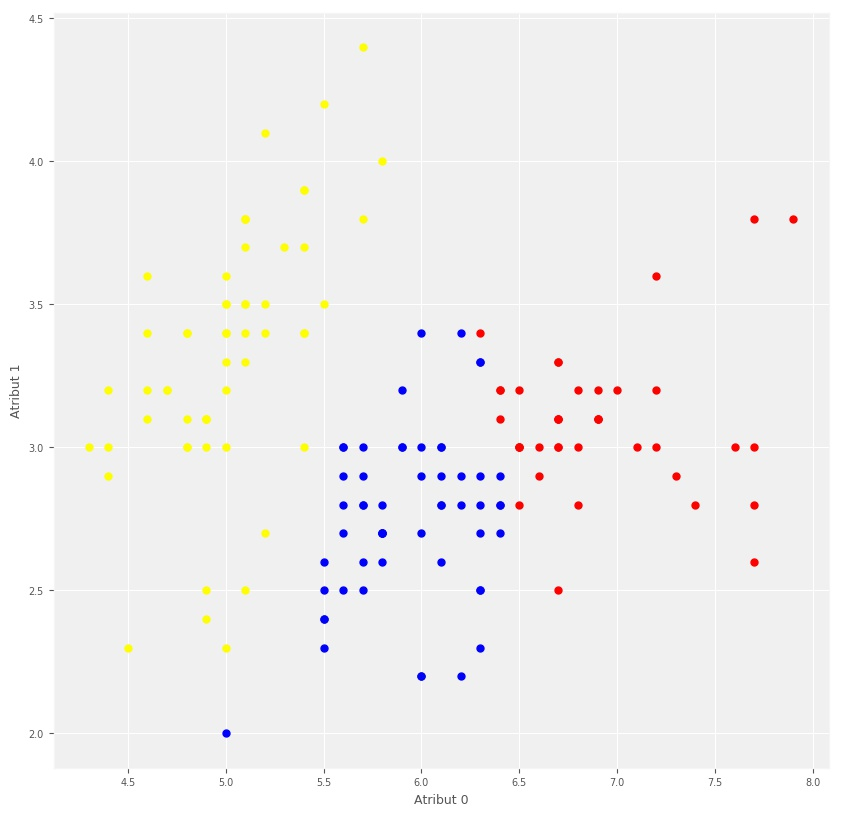

In [4]:
from sklearn.datasets import load_iris
data = load_iris()

X             = data["data"]
true_clusters = data["target"]

# Testirajte razred KMeans

# Trenutno so gruče dodeljene naključno
model = KMeans(k=3, max_iter=10)
labels, centers = model.fit(X[:, :2])

plt.figure(figsize=(10, 10))
color = {0:"red", 1:"blue", 2:"yellow"}
for c, x in zip(labels, X):
    plt.plot(x[0], x[1], ".", color=color[c], markersize=10.0)
plt.xlabel("Atribut 0")
plt.ylabel("Atribut 1")
plt.show()

##### Question 4-1-3

Draw the status of the labels and the centre of the groups in each iteration of the algorithm.

In [5]:
# ...

### Evaluating the effectiveness of group discovery

Assessing the effectiveness of group discovery is one of the unresolved challenges of machine learning. We know measures like <a href ="http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html">silhouette</a> or <a href="http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index">adjusted random index</a>.

Alternatively, we can know the real classes to which the data belongs. This is true for the iris database, where the flowers are arranged in three classes.

##### Question 4-1-4

Check how well the result of your method matches real classes? How will you measure the match? Do you encounter any problems?

In [6]:
print(true_clusters)   # Resnični razredi primerov

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


##### Question 4-1-5

Test the method in the lower, synthetic data examples. How does the KMeans method work? Why?

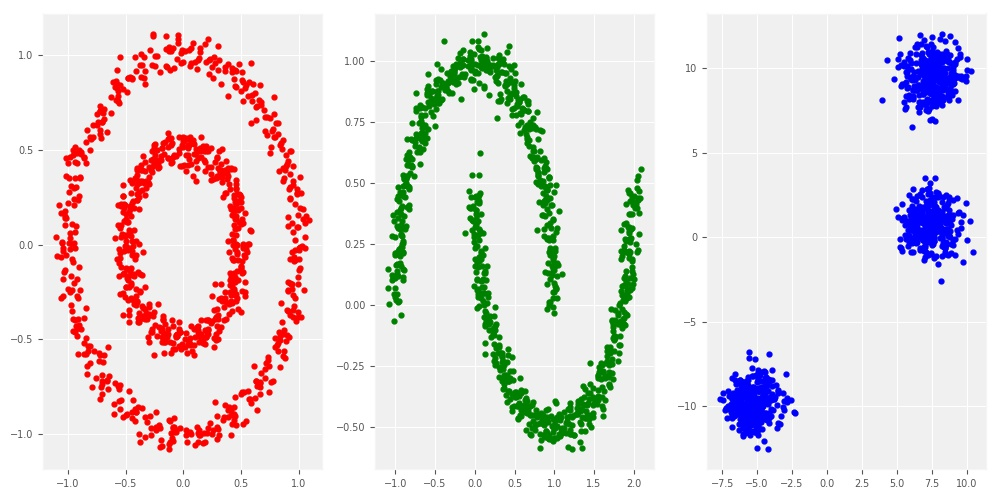

In [7]:
from sklearn.datasets import make_circles, make_blobs, make_moons

n_samples=1000
noisy_circles, _ = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons, _ = make_moons(n_samples=n_samples, noise=.05)
blobs, _ = make_blobs(n_samples=n_samples, random_state=8)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes[0].plot(noisy_circles[:, 0], noisy_circles[:, 1], "r.")
axes[1].plot(noisy_moons[:, 0], noisy_moons[:, 1], "g.")
axes[2].plot(blobs[:, 0], blobs[:, 1], "b.")

fig.tight_layout()
plt.show()

### DBSCAN method

##### Question 4-1-6

Test the <a href="http://scikit-learn.org/stable/modules/clustering.html#dbscan">DBSCAN</a> method. Does this method work better on the same data? Why? You find the answer in the method description.

In [8]:
from sklearn.cluster import DBSCAN

# model = DBSCAN(...)
# model.fit(X)
# labels = model.predict(X)